In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy.stats import uniform
%matplotlib inline

In [ ]:
#padding in logscale: frequency | amplitude
#dlogf is the spacing of exponent of 10 for frequency 
#range: np.log10(dlogf) to 0-dlogf
#filler in frequency : 10**np.linspace(lower,higher,(higher-lower)/dlogf)

In [22]:
#noise
data=np.loadtxt('curves.txt')
freq=data[:,0]
dataLigo=data[:,1]
frequency=np.zeros(4096)
amplitude=np.zeros(4096)
#crass redifinition of frequency bins
frequency[0:2048]=np.linspace(0,10000,2048)
amplitude[0:2048]=dataLigo[0:2048]

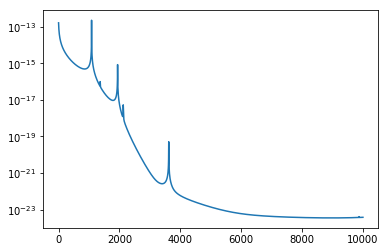

In [23]:
plt.plot(frequency[0:2048],amplitude[0:2048])
plt.yscale('log')
frequency[2048:]=np.flip(frequency[0:2048],0)
amplitude[2048:]=np.flip(amplitude[0:2048],0)
phase=np.random.uniform(0,2*np.pi,4096)
ifft=np.fft.ifft(amplitude*np.exp(1j*phase))
df=frequency[1]-frequency[0]
time=np.linspace(0,df,4096)

In [292]:
data=h5py.File('H-H1_LOSC_4_V1-931127296-4096.hdf5')

In [293]:
data.keys()

<KeysViewHDF5 ['meta', 'quality', 'strain']>

In [294]:
data['meta'].keys()

<KeysViewHDF5 ['Description', 'DescriptionURL', 'Detector', 'Duration', 'GPSstart', 'Observatory', 'Type', 'UTCstart']>

In [295]:
data['quality'].keys()

<KeysViewHDF5 ['detail', 'injections', 'simple']>

In [296]:
data['quality']['injections'].keys()

<KeysViewHDF5 ['InjDescriptions', 'InjShortnames', 'Injmask']>

In [297]:
data['quality']['simple']['DQShortnames'][()]

array([b'DATA', b'CBCHIGH_CAT1', b'CBCHIGH_CAT2', b'CBCHIGH_CAT3',
       b'CBCHIGH_CAT4', b'CBCLOW_CAT1', b'CBCLOW_CAT2', b'CBCLOW_CAT3',
       b'CBCLOW_CAT4', b'BURST_CAT1', b'BURST_CAT2', b'BURST_CAT3',
       b'BURST_CAT4', b'BURST_CAT3H', b'BURST_CAT4H', b'CW_CAT1',
       b'STOCH_CAT1'], dtype='|S12')

In [298]:
time=np.linspace(0,4096,16777216)

In [299]:
noise=data['strain']['Strain'][()] #THIS IS NOT NOISE RATHER STRAIN DATA

In [9]:
minute_data=np.zeros(69)
for n in range(69):
    minute_data[n]=1.0/240000*(sum(signal_data[n*240000:240000*(n+1)]))

In [301]:
1/(time[1]-time[0])

4095.999755859375

In [316]:
A=1.2*10**(-15)
f=40
signal=A*np.sin(2*np.pi*f*time)

In [304]:
A_temp=1.2
f_temp=40
signal_template=A_temp*1.2*10**(-15)*np.sin(2*np.pi*f_temp*time)

In [317]:
gwdata=noise+signal

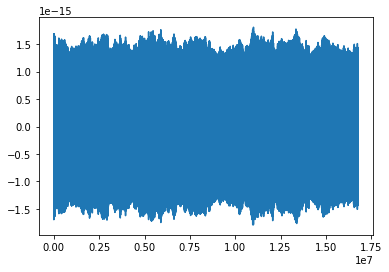

In [289]:
plt.plot(gwdata)

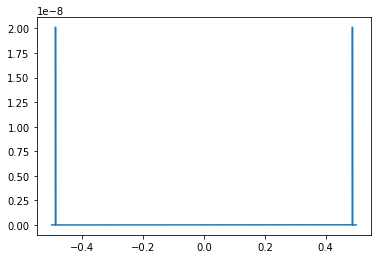

In [315]:
#fft of signal
freq=np.fft.fftfreq(len(signal_template))#,d=time[1]-time[0]) #Is the 1/T correct?
shift_freq=np.fft.fftshift(freq)
fft_signal=np.fft.fft(signal_template)
plt.plot(shift_freq,abs(fft_signal))

In [ ]:
#fft of data
freq_data=np.fft.fftfreq(len(gwdata),d=time[1]-time[0])
shift_freq_data=np.fft.fftshift(freq_data)
fft_data=np.fft.fft(gwdata)
plt.plot(shift_freq_data,abs(fft_data))

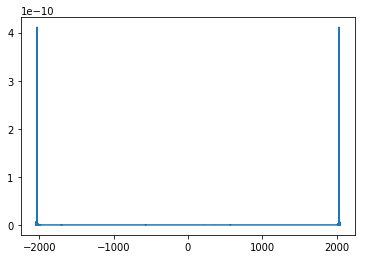

In [311]:
#fft of noise
freq_noise=np.fft.fftfreq(len(noise),d=time[1]-time[0])
shift_freq_noise=np.fft.fftshift(freq_noise)
fft_noise=np.fft.fft(noise)
plt.plot(shift_freq_noise,abs(fft_noise))

In [312]:
#definition of template
A_temp=np.linspace(1,2,6)#1.2*10**(-14)
f_temp=np.linspace(30,50,5)
likelihood=[]
#time_temp=np.linspace(0,68,69)
#signal_template=A_temp*np.sin(2*np.pi*f_temp*time_temp)
for i in range(5):
    for j in range(6):
        signal_template=A_temp[j]*1.2*10**(-15)*np.sin(2*np.pi*f_temp[i]*time)
#         minute_signaltemplate=np.zeros(69)
#         for n in range(69):
#             minute_signaltemplate[n]=1.0/240000*(sum(signal_template[n*240000:240000*(n+1)]))
        freq=np.fft.fftfreq(len(signal_template))*1/0.00025 #Is the 1/T correct?
        shift_freq=np.fft.fftshift(freq)
        fft_signal=np.fft.fft(signal_template)
        likelihood=np.append(likelihood,np.exp(-sum(abs(fft_data-fft_signal)**2/abs(fft_noise)**2)))

In [62]:
likelihood=np.exp(-sum(abs(fft_data-fft_signal)**2/abs(fft_noise)**2))

In [313]:
likelihood

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

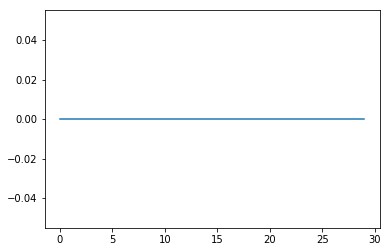

In [314]:
plt.plot(likelihood)

In [59]:
prior_amplitude = scipy.stats.uniform(10,20)
prior_inclin = scipy.stats.uniform(10,20)
prior_phase = scipy.stats.uniform(10,20)
prior_freq = scipy.stats.uniform(100,200)

In [39]:
fft_signal

array([ 7.90264739e-20+0.00000000e+00j,  7.93555590e-20-3.00686428e-25j,
        8.03566583e-20-6.06402113e-25j,  8.20727500e-20-9.22601784e-25j,
        8.45805716e-20-1.25545503e-24j,  8.79993843e-20-1.61232419e-24j,
        9.25058396e-20-2.00264598e-24j,  9.83586714e-20-2.43893495e-24j,
        1.05940312e-19-2.93861211e-24j,  1.15829548e-19-3.52702885e-24j,
        1.28935008e-19-4.24324088e-24j,  1.46757547e-19-5.15077564e-24j,
        1.71953551e-19-6.36115143e-24j,  2.09695792e-19-8.09070026e-24j,
        2.71554598e-19-1.08223229e-23j,  3.89773947e-19-1.58999769e-23j,
        7.00606197e-19-2.90012273e-23j,  3.60789172e-18-1.50280068e-22j,
       -1.14236741e-18+4.74843987e-23j, -4.94865713e-19+2.03566428e-23j,
       -3.17514297e-19+1.28161089e-23j, -2.35174291e-19+9.23242981e-24j,
       -1.87979941e-19+7.11056382e-24j, -1.57647336e-19+5.68808761e-24j,
       -1.36717499e-19+4.65351236e-24j, -1.21581855e-19+3.85553719e-24j,
       -1.10285135e-19+3.21178222e-24j, -1.01679197

In [40]:
fft_data

array([-2.60148602e-17+0.00000000e+00j, -2.95742777e-18-3.61959465e-18j,
        1.32008628e-17-4.48917546e-18j, -3.19123562e-18+1.21080946e-17j,
       -1.51634689e-17+1.65179187e-17j, -5.94255475e-18+7.95185254e-18j,
       -7.66264708e-18-6.93651949e-18j, -1.40900909e-17-3.14168586e-18j,
        3.78978857e-18+8.20072849e-18j,  3.60405936e-18-4.67259654e-18j,
        1.61662865e-17-1.63910448e-17j,  1.14322753e-17+5.47258046e-18j,
       -1.38368929e-18+1.53518206e-17j,  4.07990469e-18+8.28731000e-18j,
       -3.26506787e-18+4.18086759e-18j,  1.39488683e-18-2.35949497e-18j,
        1.13020919e-17-1.68486083e-17j, -3.64194693e-18+5.37465852e-19j,
       -5.51815233e-19-2.10980868e-18j, -9.62121854e-18-4.65539430e-18j,
       -4.80793789e-18-7.03660794e-18j,  2.70592869e-18+2.56543335e-19j,
        3.11849472e-18+5.24052527e-18j,  4.84909929e-18-7.13880690e-18j,
       -8.19407138e-18-3.36798857e-18j, -4.37995026e-19+6.04841309e-18j,
       -1.30450221e-17-6.14083385e-19j,  1.53445130

In [245]:
t=np.linspace(0,10,11)
s=20*np.sin(190*t)+15*np.sin(20*t)

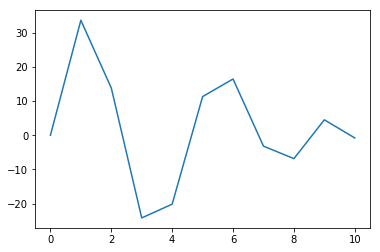

In [246]:
plt.plot(t,s)

In [247]:
ff=np.fft.fft(s)

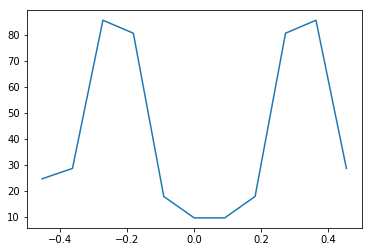

In [248]:
fr=np.fft.fftfreq(len(ff),d=t[1]-t[0])
frq=np.fft.fftshift(fr)
plt.plot(frq,abs(ff))

In [249]:
iff=np.fft.ifft(ff)

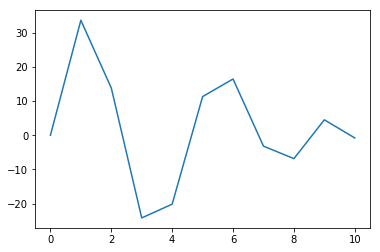

In [250]:
plt.plot(t,np.real(iff))

In [233]:
20/2/np.pi

3.183098861837907

In [216]:
1/4.8

0.20833333333333334

In [220]:
1/(t[1]-t[0])

19.9

In [244]:
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])